# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
#create empty lists to fill
City2 = []
Lat=[]
Lng=[]
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []
Country = []
Date = []
count = 0
Set = 1
#Loop through each city
for city in cities:    
    try:
        #Query API
        query_url = base_url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
        weather_response = requests.get(query_url).json()
        #Start the count and if it's greater than 50, then start a new set and sleep for 1 sec to allow time for API
        if count > 50:
            Set += 1
            count = 0
            time.sleep(1.0)
        count += 1
        #Print out the beginning and append to lists
        print(f"Processing Record {count} of Set {Set} | {city}")
        City2.append(weather_response['name'])
        Lat.append(weather_response['coord']['lat'])
        Lng.append(weather_response['coord']['lon'])
        Max_Temp.append(weather_response['main']['temp_max'])
        Humidity.append(weather_response['main']['humidity'])
        Cloudiness.append(weather_response['clouds']['all'])
        Wind_Speed.append(weather_response['wind']['speed'])
        Country.append(weather_response["sys"]['country'])
        Date.append(weather_response['dt'])
    #If there is an error finding the city, skip
    except KeyError:
        print("City not found. Skipping...")
print("------------------------------")
print("Data Retrieval Complete")
print("------------------------------")

Processing Record 1 of Set 1 | hilo
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | myanaung
Processing Record 4 of Set 1 | georgetown
Processing Record 5 of Set 1 | atuona
Processing Record 6 of Set 1 | kodiak
Processing Record 7 of Set 1 | carnarvon
Processing Record 8 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 9 of Set 1 | esperance
Processing Record 10 of Set 1 | lhuntshi
City not found. Skipping...
Processing Record 11 of Set 1 | raudeberg
Processing Record 12 of Set 1 | pueblo nuevo
Processing Record 13 of Set 1 | chokurdakh
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 16 of Set 1 | labytnangi
Processing Record 17 of Set 1 | tautira
Processing Record 18 of Set 1 | augusto correa
Processing Record 19 of Set 1 | kashi
Processing Record 20 of Set 1 | vaini
Processing Record 21 of Set 1 | port alfred
Processing Record 22 of Set 1 | taolanaro
City

Processing Record 34 of Set 4 | wewak
Processing Record 35 of Set 4 | havoysund
Processing Record 36 of Set 4 | iracoubo
Processing Record 37 of Set 4 | gravelbourg
Processing Record 38 of Set 4 | gamba
Processing Record 39 of Set 4 | coihaique
Processing Record 40 of Set 4 | jacmel
Processing Record 41 of Set 4 | matay
Processing Record 42 of Set 4 | maturin
Processing Record 43 of Set 4 | rundu
Processing Record 44 of Set 4 | dzhusaly
City not found. Skipping...
Processing Record 45 of Set 4 | icod de los vinos
Processing Record 46 of Set 4 | kingman
Processing Record 47 of Set 4 | kuche
City not found. Skipping...
Processing Record 48 of Set 4 | guhagar
Processing Record 49 of Set 4 | wanlaweyn
Processing Record 50 of Set 4 | ponta do sol
Processing Record 51 of Set 4 | samalaeulu
City not found. Skipping...
Processing Record 1 of Set 5 | coaticook
Processing Record 2 of Set 5 | chuy
Processing Record 3 of Set 5 | karmana
City not found. Skipping...
Processing Record 4 of Set 5 | ka

Processing Record 18 of Set 8 | namatanai
Processing Record 19 of Set 8 | bagan
Processing Record 20 of Set 8 | penzance
Processing Record 21 of Set 8 | hokitika
Processing Record 22 of Set 8 | olafsvik
Processing Record 23 of Set 8 | paamiut
Processing Record 24 of Set 8 | ploemeur
Processing Record 25 of Set 8 | nago
Processing Record 26 of Set 8 | coxim
Processing Record 27 of Set 8 | kanniyakumari
Processing Record 28 of Set 8 | gravdal
Processing Record 29 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 30 of Set 8 | pimentel
Processing Record 31 of Set 8 | sistranda
Processing Record 32 of Set 8 | cairns
Processing Record 33 of Set 8 | bhainsa
Processing Record 34 of Set 8 | banganapalle
Processing Record 35 of Set 8 | tilichiki
Processing Record 36 of Set 8 | bokoro
Processing Record 37 of Set 8 | chapais
Processing Record 38 of Set 8 | ixtapa
Processing Record 39 of Set 8 | hambantota
Processing Record 40 of Set 8 | xinzhou
Processing Record 41 of Set 8 | pisco
Processin

Processing Record 51 of Set 11 | pontianak
Processing Record 1 of Set 12 | manokwari
Processing Record 2 of Set 12 | santa maria
Processing Record 3 of Set 12 | korcula
Processing Record 4 of Set 12 | pingliang
Processing Record 5 of Set 12 | zhigansk
Processing Record 6 of Set 12 | cartagena
Processing Record 7 of Set 12 | atocha
Processing Record 8 of Set 12 | verkhnyaya inta
Processing Record 9 of Set 12 | asyut
Processing Record 10 of Set 12 | north bend
Processing Record 11 of Set 12 | malakal
Processing Record 12 of Set 12 | salekhard
Processing Record 13 of Set 12 | salta
Processing Record 14 of Set 12 | maracaju
Processing Record 15 of Set 12 | dickinson
Processing Record 16 of Set 12 | languyan
Processing Record 17 of Set 12 | tavda
Processing Record 18 of Set 12 | nizwa
Processing Record 19 of Set 12 | oia
Processing Record 20 of Set 12 | sola
Processing Record 21 of Set 12 | vestmanna
Processing Record 22 of Set 12 | san andres
Processing Record 23 of Set 12 | bandarbeyla
Pr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
df = pd.DataFrame({"City":City2,
                        "Lat":Lat,
                        "Lng":Lng,
                        "Max Temp":Max_Temp,
                        "Humidity":Humidity,
                        "Cloudiness":Cloudiness,
                        "Wind Speed":Wind_Speed,
                        "Country":Country,
                        "Date":Date})

df.to_csv(output_data_file)
df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hilo,19.73,-155.09,82.40,58,75,9.17,US,1607477493
1,Rikitea,-23.12,-134.97,77.14,78,2,14.05,PF,1607477666
2,Myanaung,18.28,95.32,70.92,74,85,7.29,MM,1607477667
3,George Town,5.41,100.34,82.40,78,20,4.70,MY,1607477592
4,Atuona,-9.80,-139.03,79.20,73,9,12.82,PF,1607477667


In [5]:
df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,5.610000e+02
mean,18.730339,19.586239,53.600107,74.078431,50.320856,7.461604,1.607478e+09
std,32.649703,91.212898,28.013250,19.309812,40.732013,5.234343,7.622224e+01
min,-54.800000,-179.170000,-32.820000,9.000000,0.000000,0.200000,1.607477e+09
25%,-6.880000,-60.570000,35.600000,65.000000,2.000000,3.440000,1.607478e+09
50%,21.350000,24.660000,62.780000,79.000000,52.000000,6.020000,1.607478e+09
75%,46.080000,100.350000,75.360000,88.000000,91.000000,10.000000,1.607478e+09
max,78.220000,178.420000,91.990000,100.000000,100.000000,31.470000,1.607478e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#Locate all rows with humidity greater than 100
Humidity100 = df.loc[df["Humidity"]>100]
Humidity100.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [7]:
#  Get the indices of cities that have humidity over 100%.
Humidity100_index = df.index[df["Humidity"]>100]
print(Humidity100_index)

Int64Index([], dtype='int64')


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_df = df.drop(Humidity100_index, inplace = False)
clean_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hilo,19.73,-155.09,82.40,58,75,9.17,US,1607477493
1,Rikitea,-23.12,-134.97,77.14,78,2,14.05,PF,1607477666
2,Myanaung,18.28,95.32,70.92,74,85,7.29,MM,1607477667
3,George Town,5.41,100.34,82.40,78,20,4.70,MY,1607477592
4,Atuona,-9.80,-139.03,79.20,73,9,12.82,PF,1607477667


In [10]:
date_pull = clean_df.iloc[0,8]
date_pull = datetime.utcfromtimestamp(date_pull).strftime('%m/%d/%y')
date_pull


'12/09/20'

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

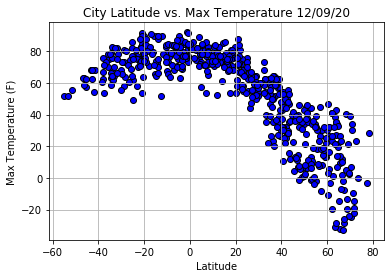

In [12]:
x_axis = clean_df["Lat"]
y_axis = clean_df["Max Temp"]
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature " + date_pull)
plt.savefig("Images/LatitudeVtemp.png")
plt.show()

## Latitude vs. Humidity Plot

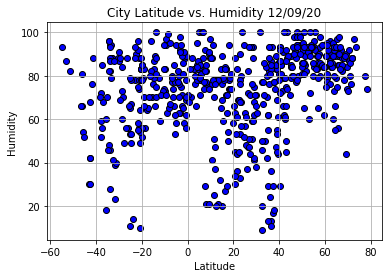

In [13]:
y_axis = clean_df["Humidity"]
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs. Humidity " + date_pull)
plt.savefig("Images/LatitudeVhumidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

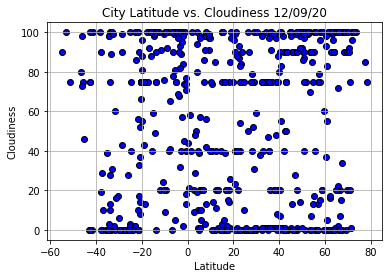

In [14]:
y_axis = clean_df["Cloudiness"]
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs. Cloudiness "+ date_pull)
plt.savefig("Images/LatitudeVcloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

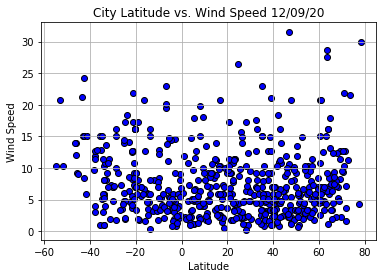

In [15]:
y_axis = clean_df["Wind Speed"]
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs. Wind Speed " + date_pull)
plt.savefig("Images/LatitudeVwindSpeed.png")
plt.show()

## Linear Regression

In [17]:
df_north = clean_df.loc[clean_df["Lat"]>=0]
df_south = clean_df.loc[clean_df["Lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The rsquare-value is: 0.75


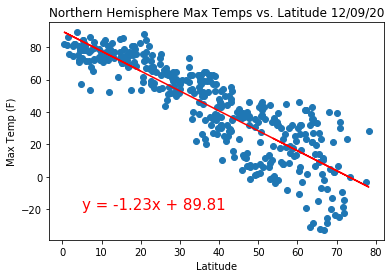

In [18]:
x_axis = df_north["Lat"]
y_axis = df_north["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
print(f"The rsquare-value is: {round(rvalue**2,2)}")
regress_values = [x * slope + intercept for x in x_axis]
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values,"r-")
plt.annotate(line_eq,(5,-20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title("Northern Hemisphere Max Temps vs. Latitude " + date_pull)
plt.savefig("Images/LinReg Northern Hemisphere Max Temps vs. Latitude.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The rsquare-value is: 0.3


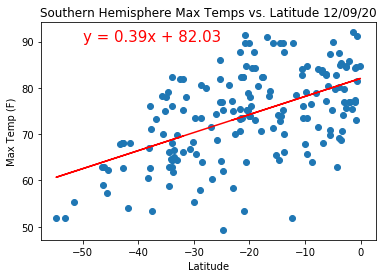

In [19]:
x_axis = df_south["Lat"]
y_axis = df_south["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
print(f"The rsquare-value is: {round(rvalue**2,2)}")
regress_values = [x * slope + intercept for x in x_axis]
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values,"r-")
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title("Southern Hemisphere Max Temps vs. Latitude " + date_pull)
plt.savefig("Images/LinReg Southern Hemisphere Max Temps vs. Latitude.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The rsquare-value is: 0.09


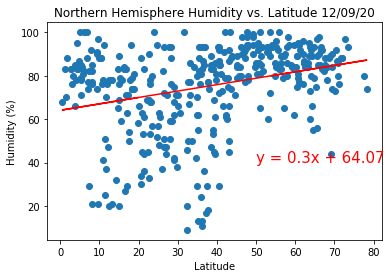

In [20]:
x_axis = df_north["Lat"]
y_axis = df_north["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
print(f"The rsquare-value is: {round(rvalue**2,2)}")
regress_values = [x * slope + intercept for x in x_axis]
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values,"r-")
plt.annotate(line_eq,(50,40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere Humidity vs. Latitude " + date_pull)
plt.savefig("Images/LinReg Northern Hemisphere Humidity vs. Latitude.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The rsquare-value is: 0.05


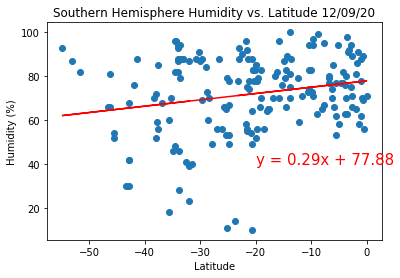

In [21]:
x_axis = df_south["Lat"]
y_axis = df_south["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
print(f"The rsquare-value is: {round(rvalue**2,2)}")
regress_values = [x * slope + intercept for x in x_axis]
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values,"r-")
plt.annotate(line_eq,(-20,40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere Humidity vs. Latitude " + date_pull)
plt.savefig("Images/LinReg Southern Hemisphere Humidity vs. Latitude.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The rsquare-value is: 0.03


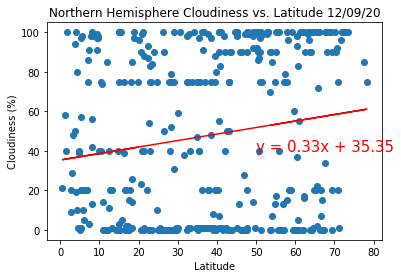

In [22]:
x_axis = df_north["Lat"]
y_axis = df_north["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
print(f"The rsquare-value is: {round(rvalue**2,2)}")
regress_values = [x * slope + intercept for x in x_axis]
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values,"r-")
plt.annotate(line_eq,(50,40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere Cloudiness vs. Latitude " + date_pull)
plt.savefig("Images/LinReg Northern Hemisphere Cloudiness vs. Latitude.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The rsquare-value is: 0.06


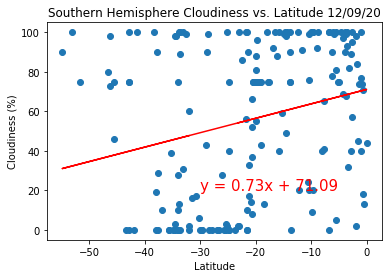

In [23]:
x_axis = df_south["Lat"]
y_axis = df_south["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
print(f"The rsquare-value is: {round(rvalue**2,2)}")
regress_values = [x * slope + intercept for x in x_axis]
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere Cloudiness vs. Latitude " + date_pull)
plt.savefig("Images/LinReg Southern Hemisphere Cloudiness vs. Latitude.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The rsquare-value is: 0.02


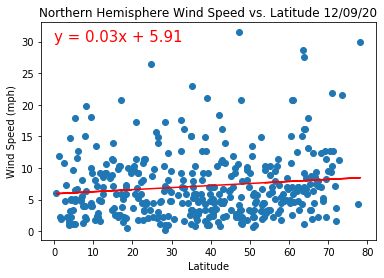

In [24]:
x_axis = df_north["Lat"]
y_axis = df_north["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
print(f"The rsquare-value is: {round(rvalue**2,2)}")
regress_values = [x * slope + intercept for x in x_axis]
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values,"r-")
plt.annotate(line_eq,(0,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere Wind Speed vs. Latitude " + date_pull) 
plt.savefig("Images/LinReg Northern Hemisphere Wind Speed vs. Latitude.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The rsquare-value is: 0.09


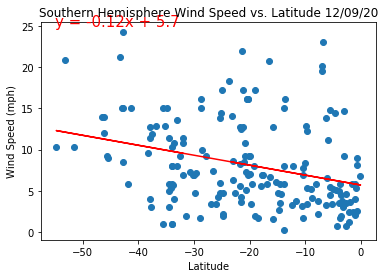

In [25]:
x_axis = df_south["Lat"]
y_axis = df_south["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
print(f"The rsquare-value is: {round(rvalue**2,2)}")
regress_values = [x * slope + intercept for x in x_axis]
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values,"r-")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere Wind Speed vs. Latitude " + date_pull)
plt.savefig("Images/LinReg Southern Hemisphere Wind Speed vs. Latitude.png")
plt.show()